### 데이터 준비

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from genericpath import exists
import os
import zipfile

zip_path = '/content/drive/MyDrive/make_object_detection.v2i.yolov8.zip'
extract_to_path = '/content/detection_data'

os.makedirs(extract_to_path, exist_ok=True)

with zipfile.ZipFile(zip_path,'r') as zip_ref:
  zip_ref.extractall(extract_to_path)

print(f"압축완료: {extract_to_path}")

압축완료: /content/detection_data


### 필요 라이브러리 임포트

In [ ]:
import os                   # 시스템 경로 및 파일 관련 기능을 사용하기 위한 라이브러리
import json                 # JSON 데이터를 다루기 위한 라이브러리
import glob                 # 파일 패턴 매칭을 위한 라이브러리
import numpy as np          # 다차원 배열 및 수학 연산 처리를 위한 라이브러리
import pandas as pd         # 데이터프레임을 활용한 데이터 조작 및 분석을 위한 라이브러리
from ast import literal_eval  # 문자열을 코드로 변환하는 함수
from PIL import Image, ImageDraw  # 이미지 처리를 위한 라이브러리
import matplotlib.pyplot as plt  # 시각화를 위한 라이브러리
from tqdm import tqdm        # 반복문의 진행 상황을 표시하는 라이브러리
import random                # 랜덤 함수 사용을 위한 라이브러리
import yaml                  # yaml파일을 다루기 위한 라이브러리
from collections import OrderedDict # collections에서 제공하는 항목의 순서를 기억하는 딕셔너리
import shutil                # 파일의 이동과 복사를 위한 라이브러리

### 모델가져오기




In [3]:
!pip3 install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.7/898.7 kB 28.4 MB/s eta 0:00:00


In [4]:
import ultralytics
from ultralytics import YOLO
from IPython.display import Image as show_image
import glob
import random
import matplotlib.pyplot as plt
ultralytics.checks()

Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.9/235.7 GB disk)


In [5]:
model = YOLO('yolov8n.pt') #yolov8n(나노), yolov8s(스몰), yolov8m(미디움), yolov8l(라지), yolov8x(엑스트라) 등이 있음

100%|██████████| 6.25M/6.25M [00:00<00:00, 107MB/s]


### 내 데이터 학습시키기

In [6]:
project = "make_pasukkun" #학습 결과가 저장될 프로젝트 폴더
name = "after_train_result" # 학습결과를 저장할 실험(experiment)폴더 이름
dataset_path = "/content/detection_data/data.yaml" #yaml 파일 경로

In [7]:
model.train(
    data=dataset_path, # 데이터셋 경로(yaml파일)
    epochs=120, # 최대 학습 epoch
    project=project, # project 폴더 이름
    name=name, # experiment 폴더 이름
    exist_ok=True, # 덮어쓰기 여부 False일때 덮어쓰기 불 허용
    seed=42, # 재현성을 위한 시드 설정
    optimizer='AdamW', # optimizer는 AdamW로 지정
    patience=10, # 30epoch동안 loss가 개선되지 않으면 종료
    batch=64, # 훈련 배치 사이즈는 32
    imgsz=640 # 이미지 사이즈는 640
)

Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/detection_data/data.yaml, epochs=120, time=None, patience=10, batch=64, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=make_pasukkun, name=after_train_result, exist_ok=True, pretrained=True, optimizer=AdamW, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=Tr

100%|██████████| 755k/755k [00:00<00:00, 18.4MB/s]


Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 110MB/s]


AMP: checks passed ✅


train: Scanning /content/detection_data/train/labels... 1338 images, 18 backgrounds, 0 corrupt: 100%|██████████| 1338/1338 [00:00<00:00, 1904.38it/s]


train: New cache created: /content/detection_data/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.22 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/detection_data/valid/labels... 27 images, 0 backgrounds, 0 corrupt: 100%|██████████| 27/27 [00:00<00:00, 1561.54it/s]

val: New cache created: /content/detection_data/valid/labels.cache


Plotting labels to make_pasukkun/after_train_result/labels.jpg... 
optimizer: AdamW(lr=0.01, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to make_pasukkun/after_train_result
Starting training for 120 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/120      8.21G      1.176      2.781       1.43        135        640: 100%|██████████| 21/21 [00:24<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.29s/it]

                   all         27         27    0.00222      0.122   0.000826   0.000183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/120      8.13G      1.332       2.06      1.583        139        640: 100%|██████████| 21/21 [00:24<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.08s/it]

                   all         27         27    0.00222      0.122   0.000826   0.000183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/120      8.17G      1.354      1.919      1.586        150        640: 100%|██████████| 21/21 [00:31<00:00,  1.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.35it/s]

                   all         27         27    0.00222      0.122   0.000826   0.000183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/120      8.06G      1.312      1.879      1.553        127        640: 100%|██████████| 21/21 [00:23<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.15it/s]

                   all         27         27   0.000723      0.111   0.000333   7.17e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/120      8.15G      1.335      1.867      1.572        122        640: 100%|██████████| 21/21 [00:26<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.09it/s]

                   all         27         27      0.833     0.0556     0.0279    0.00595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/120      8.13G       1.27      1.751      1.511        109        640: 100%|██████████| 21/21 [00:22<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.33it/s]

                   all         27         27      0.833     0.0556     0.0279    0.00595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/120         8G      1.242      1.673      1.498        156        640: 100%|██████████| 21/21 [00:24<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.92it/s]

                   all         27         27      0.833     0.0556     0.0279    0.00595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/120      8.19G      1.196      1.601      1.453        177        640: 100%|██████████| 21/21 [00:32<00:00,  1.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.00it/s]

                   all         27         27      0.334     0.0333   6.92e-05   2.01e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/120         8G      1.179      1.528      1.449        112        640: 100%|██████████| 21/21 [00:23<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.81it/s]

                   all         27         27   0.000176     0.0333   6.65e-05   1.33e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/120      8.05G      1.115      1.416      1.383        148        640: 100%|██████████| 21/21 [00:23<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.08it/s]

                   all         27         27     0.0454       0.23     0.0229    0.00649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/120      8.15G        1.1      1.372      1.374        148        640: 100%|██████████| 21/21 [00:25<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.33it/s]

                   all         27         27     0.0626     0.0606     0.0302    0.00838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/120         8G      1.061      1.375       1.34        143        640: 100%|██████████| 21/21 [00:27<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.93it/s]

                   all         27         27      0.357     0.0667     0.0104    0.00327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/120      8.07G      1.038      1.303      1.333        120        640: 100%|██████████| 21/21 [00:25<00:00,  1.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.20it/s]

                   all         27         27      0.487     0.0303     0.0249     0.0138



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/120      8.13G     0.9897      1.283      1.325        152        640: 100%|██████████| 21/21 [00:23<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.29it/s]

                   all         27         27    0.00632     0.0556    0.00303    0.00077



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/120      8.17G     0.9866      1.259      1.294        149        640: 100%|██████████| 21/21 [00:25<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.23it/s]

                   all         27         27      0.362      0.097    0.00946    0.00375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/120      8.05G     0.9957      1.219      1.299        131        640: 100%|██████████| 21/21 [00:23<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.79it/s]

                   all         27         27       0.21     0.0939     0.0523      0.031



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/120      8.06G     0.9605      1.192      1.281        120        640: 100%|██████████| 21/21 [00:24<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.65it/s]

                   all         27         27      0.363     0.0889     0.0118    0.00562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/120      8.14G     0.9814      1.209      1.281        134        640: 100%|██████████| 21/21 [00:23<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.97it/s]

                   all         27         27     0.0683      0.222     0.0693     0.0361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/120      8.06G      0.948      1.138       1.27        128        640: 100%|██████████| 21/21 [00:23<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.21it/s]

                   all         27         27      0.161      0.172      0.102     0.0436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/120      8.05G     0.9217      1.089      1.245        149        640: 100%|██████████| 21/21 [00:25<00:00,  1.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.08it/s]

                   all         27         27      0.276      0.205      0.127     0.0671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/120      8.11G     0.9238      1.102      1.264        127        640: 100%|██████████| 21/21 [00:24<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.03it/s]

                   all         27         27      0.184      0.221        0.2     0.0907



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/120         8G     0.9044      1.074      1.237        139        640: 100%|██████████| 21/21 [00:25<00:00,  1.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.89it/s]

                   all         27         27      0.614      0.276      0.288      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/120      8.07G     0.9026      1.072      1.229        132        640: 100%|██████████| 21/21 [00:22<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.67it/s]

                   all         27         27     0.0988      0.144      0.106     0.0393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/120         8G     0.8557      1.002      1.212        122        640: 100%|██████████| 21/21 [00:24<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.62it/s]

                   all         27         27      0.636      0.573      0.597      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/120         8G     0.8395     0.9501      1.185        126        640: 100%|██████████| 21/21 [00:22<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.69it/s]

                   all         27         27      0.422      0.392      0.395      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/120      8.06G     0.8279     0.9337      1.192        127        640: 100%|██████████| 21/21 [00:24<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.82it/s]

                   all         27         27      0.363      0.362      0.348      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/120      8.05G      0.833      1.009      1.188        118        640: 100%|██████████| 21/21 [00:22<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.14it/s]

                   all         27         27      0.605      0.495       0.62      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/120      8.17G     0.8086     0.9385      1.173        130        640: 100%|██████████| 21/21 [00:22<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.69it/s]

                   all         27         27      0.476      0.525      0.425      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/120      8.17G     0.8317     0.9243      1.184        146        640: 100%|██████████| 21/21 [00:24<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.42it/s]

                   all         27         27      0.629      0.581      0.644      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/120         8G     0.8355     0.9413      1.183        126        640: 100%|██████████| 21/21 [00:26<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.41it/s]

                   all         27         27      0.414      0.517      0.465      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/120      8.14G     0.8291     0.9622       1.18        135        640: 100%|██████████| 21/21 [00:24<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.41it/s]

                   all         27         27      0.456        0.3      0.155     0.0795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/120         8G      0.817     0.9182       1.17        144        640: 100%|██████████| 21/21 [00:23<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.40it/s]

                   all         27         27       0.29      0.235       0.19      0.108



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/120      8.17G      0.791     0.8939      1.183        135        640: 100%|██████████| 21/21 [00:21<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.67it/s]

                   all         27         27      0.561       0.71      0.605      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/120         8G     0.7678     0.8767      1.154        104        640: 100%|██████████| 21/21 [00:25<00:00,  1.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.04it/s]

                   all         27         27      0.749      0.519      0.531      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/120      8.14G     0.7643     0.8651      1.153        112        640: 100%|██████████| 21/21 [00:22<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.23it/s]

                   all         27         27      0.384      0.617      0.479      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/120      8.19G      0.762     0.8586       1.15        128        640: 100%|██████████| 21/21 [00:22<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.03it/s]

                   all         27         27       0.56      0.487       0.57      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/120      8.15G     0.7906     0.8824      1.163        133        640: 100%|██████████| 21/21 [00:24<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.01it/s]

                   all         27         27      0.544      0.641      0.572      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/120      8.17G     0.7622     0.8467      1.151        136        640: 100%|██████████| 21/21 [00:22<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.73it/s]

                   all         27         27      0.555      0.551      0.539      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/120      8.05G     0.7657     0.8354      1.145        146        640: 100%|██████████| 21/21 [00:27<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.70it/s]

                   all         27         27      0.348      0.296      0.272      0.132



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/120      8.24G     0.7518     0.8074      1.147        148        640: 100%|██████████| 21/21 [00:22<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.40it/s]

                   all         27         27      0.467      0.506      0.455      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/120      8.19G     0.7486     0.7892      1.144        131        640: 100%|██████████| 21/21 [00:22<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.19it/s]

                   all         27         27      0.683      0.492      0.543      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/120      8.05G     0.7304      0.767      1.126        131        640: 100%|██████████| 21/21 [00:24<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.59it/s]

                   all         27         27      0.759      0.661      0.609      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/120      8.11G     0.7254      0.772      1.119        117        640: 100%|██████████| 21/21 [00:22<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.77it/s]

                   all         27         27      0.666      0.656      0.586       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/120      8.13G     0.7055     0.7879      1.115        113        640: 100%|██████████| 21/21 [00:23<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.84it/s]

                   all         27         27      0.453      0.459      0.504      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/120      8.21G     0.7239     0.7571      1.115        115        640: 100%|██████████| 21/21 [00:23<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.54it/s]

                   all         27         27      0.547      0.343       0.44      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/120         8G     0.7407     0.7493      1.132        116        640: 100%|██████████| 21/21 [00:21<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.26it/s]

                   all         27         27      0.768      0.454      0.496       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/120      8.06G      0.745     0.7624      1.123        137        640: 100%|██████████| 21/21 [00:25<00:00,  1.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.17it/s]

                   all         27         27      0.527       0.72      0.596      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/120      8.21G     0.7017     0.7311      1.109        129        640: 100%|██████████| 21/21 [00:22<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.01it/s]

                   all         27         27      0.829      0.378      0.525      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/120      8.21G     0.6989     0.7239       1.11        124        640: 100%|██████████| 21/21 [00:24<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.17it/s]

                   all         27         27      0.359      0.536      0.475      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/120      8.17G     0.7053      0.731       1.11        145        640: 100%|██████████| 21/21 [00:24<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.73it/s]

                   all         27         27      0.527      0.597       0.56      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/120      8.05G     0.7247     0.7513      1.117        120        640: 100%|██████████| 21/21 [00:22<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.50it/s]

                   all         27         27       0.57      0.723      0.654      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/120      8.13G      0.686     0.7024      1.096        139        640: 100%|██████████| 21/21 [00:24<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.86it/s]

                   all         27         27        0.9      0.639      0.707      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/120      8.17G     0.6664      0.687      1.086        136        640: 100%|██████████| 21/21 [00:22<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.44it/s]

                   all         27         27      0.479      0.479      0.339      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/120      8.19G     0.6735     0.6662       1.09        141        640: 100%|██████████| 21/21 [00:23<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.19it/s]

                   all         27         27      0.674      0.594      0.657      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/120         8G     0.6677     0.6783      1.082        121        640: 100%|██████████| 21/21 [00:24<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.99it/s]

                   all         27         27      0.473      0.479      0.421      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/120         8G     0.6797     0.6766      1.087        150        640: 100%|██████████| 21/21 [00:21<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.26it/s]

                   all         27         27      0.898      0.658      0.693      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/120      8.05G     0.6653     0.6572      1.084        122        640: 100%|██████████| 21/21 [00:23<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.89it/s]

                   all         27         27      0.596      0.503      0.522      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/120      8.15G     0.6575     0.6731      1.082        111        640: 100%|██████████| 21/21 [00:25<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.16it/s]

                   all         27         27      0.363      0.228      0.183       0.14



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/120      8.13G     0.6447     0.6492      1.071        140        640: 100%|██████████| 21/21 [00:22<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.90it/s]

                   all         27         27      0.687      0.656      0.613      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/120      8.07G     0.6489     0.6405      1.068        147        640: 100%|██████████| 21/21 [00:24<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.29it/s]

                   all         27         27      0.878      0.637      0.729      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/120         8G     0.6286     0.6311      1.071        145        640: 100%|██████████| 21/21 [00:23<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.60it/s]

                   all         27         27      0.692      0.694      0.748      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/120      8.05G     0.6457     0.6599      1.078        148        640: 100%|██████████| 21/21 [00:22<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.13it/s]

                   all         27         27       0.62      0.676       0.71      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/120      8.05G     0.6159     0.6244      1.048        145        640: 100%|██████████| 21/21 [00:23<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.06it/s]

                   all         27         27      0.852      0.792      0.831      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/120         8G     0.6074     0.6167      1.052        134        640: 100%|██████████| 21/21 [00:22<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.95it/s]

                   all         27         27      0.804      0.598      0.716      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/120      8.11G     0.6197     0.5984      1.055        132        640: 100%|██████████| 21/21 [00:24<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.93it/s]

                   all         27         27      0.571      0.799       0.75      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/120      8.05G      0.634     0.6312      1.074        120        640: 100%|██████████| 21/21 [00:22<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.02it/s]

                   all         27         27      0.643      0.759      0.707      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/120      8.06G     0.6002     0.6045      1.062        152        640: 100%|██████████| 21/21 [00:23<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.95it/s]

                   all         27         27      0.819      0.744      0.757       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/120         8G     0.6068     0.6286      1.058        135        640: 100%|██████████| 21/21 [00:26<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.05it/s]

                   all         27         27      0.679      0.767      0.722      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/120      8.05G     0.6028     0.6015      1.055        126        640: 100%|██████████| 21/21 [00:22<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.06it/s]

                   all         27         27      0.682      0.609      0.617      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/120      8.06G     0.6069     0.6074       1.07        152        640: 100%|██████████| 21/21 [00:22<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.87it/s]

                   all         27         27      0.516      0.539      0.539      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/120         8G     0.6168     0.6033      1.058        127        640: 100%|██████████| 21/21 [00:23<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.11it/s]

                   all         27         27      0.663      0.756      0.761      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/120         8G     0.6208     0.5637      1.057        135        640: 100%|██████████| 21/21 [00:22<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.89it/s]

                   all         27         27      0.623      0.633      0.648      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/120      8.14G     0.5877     0.5602      1.039        139        640: 100%|██████████| 21/21 [00:25<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.65it/s]

                   all         27         27      0.757      0.748      0.712      0.433
EarlyStopping: Training stopped early as no improvement observed in last 10 epochs. Best results observed at epoch 63, best model saved as best.pt.
To update EarlyStopping(patience=10) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



73 epochs completed in 0.540 hours.
Optimizer stripped from make_pasukkun/after_train_result/weights/last.pt, 6.3MB
Optimizer stripped from make_pasukkun/after_train_result/weights/best.pt, 6.3MB

Validating make_pasukkun/after_train_result/weights/best.pt...
Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.73it/s]


                   all         27         27      0.853      0.792      0.829      0.488
                gorani          6          6      0.878      0.667      0.774      0.377
                weasel         10         10      0.711        0.8      0.741      0.454
             wild boar         11         11      0.968      0.909      0.971      0.633
Speed: 0.4ms preprocess, 2.4ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to make_pasukkun/after_train_result


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d9847b13460>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04

In [8]:
print(type(model.names), len(model.names))
print(model.names)

<class 'dict'> 3
{0: 'gorani', 1: 'weasel', 2: 'wild boar'}


In [9]:
model = YOLO(f"{project}/{name}/weights/best.pt")


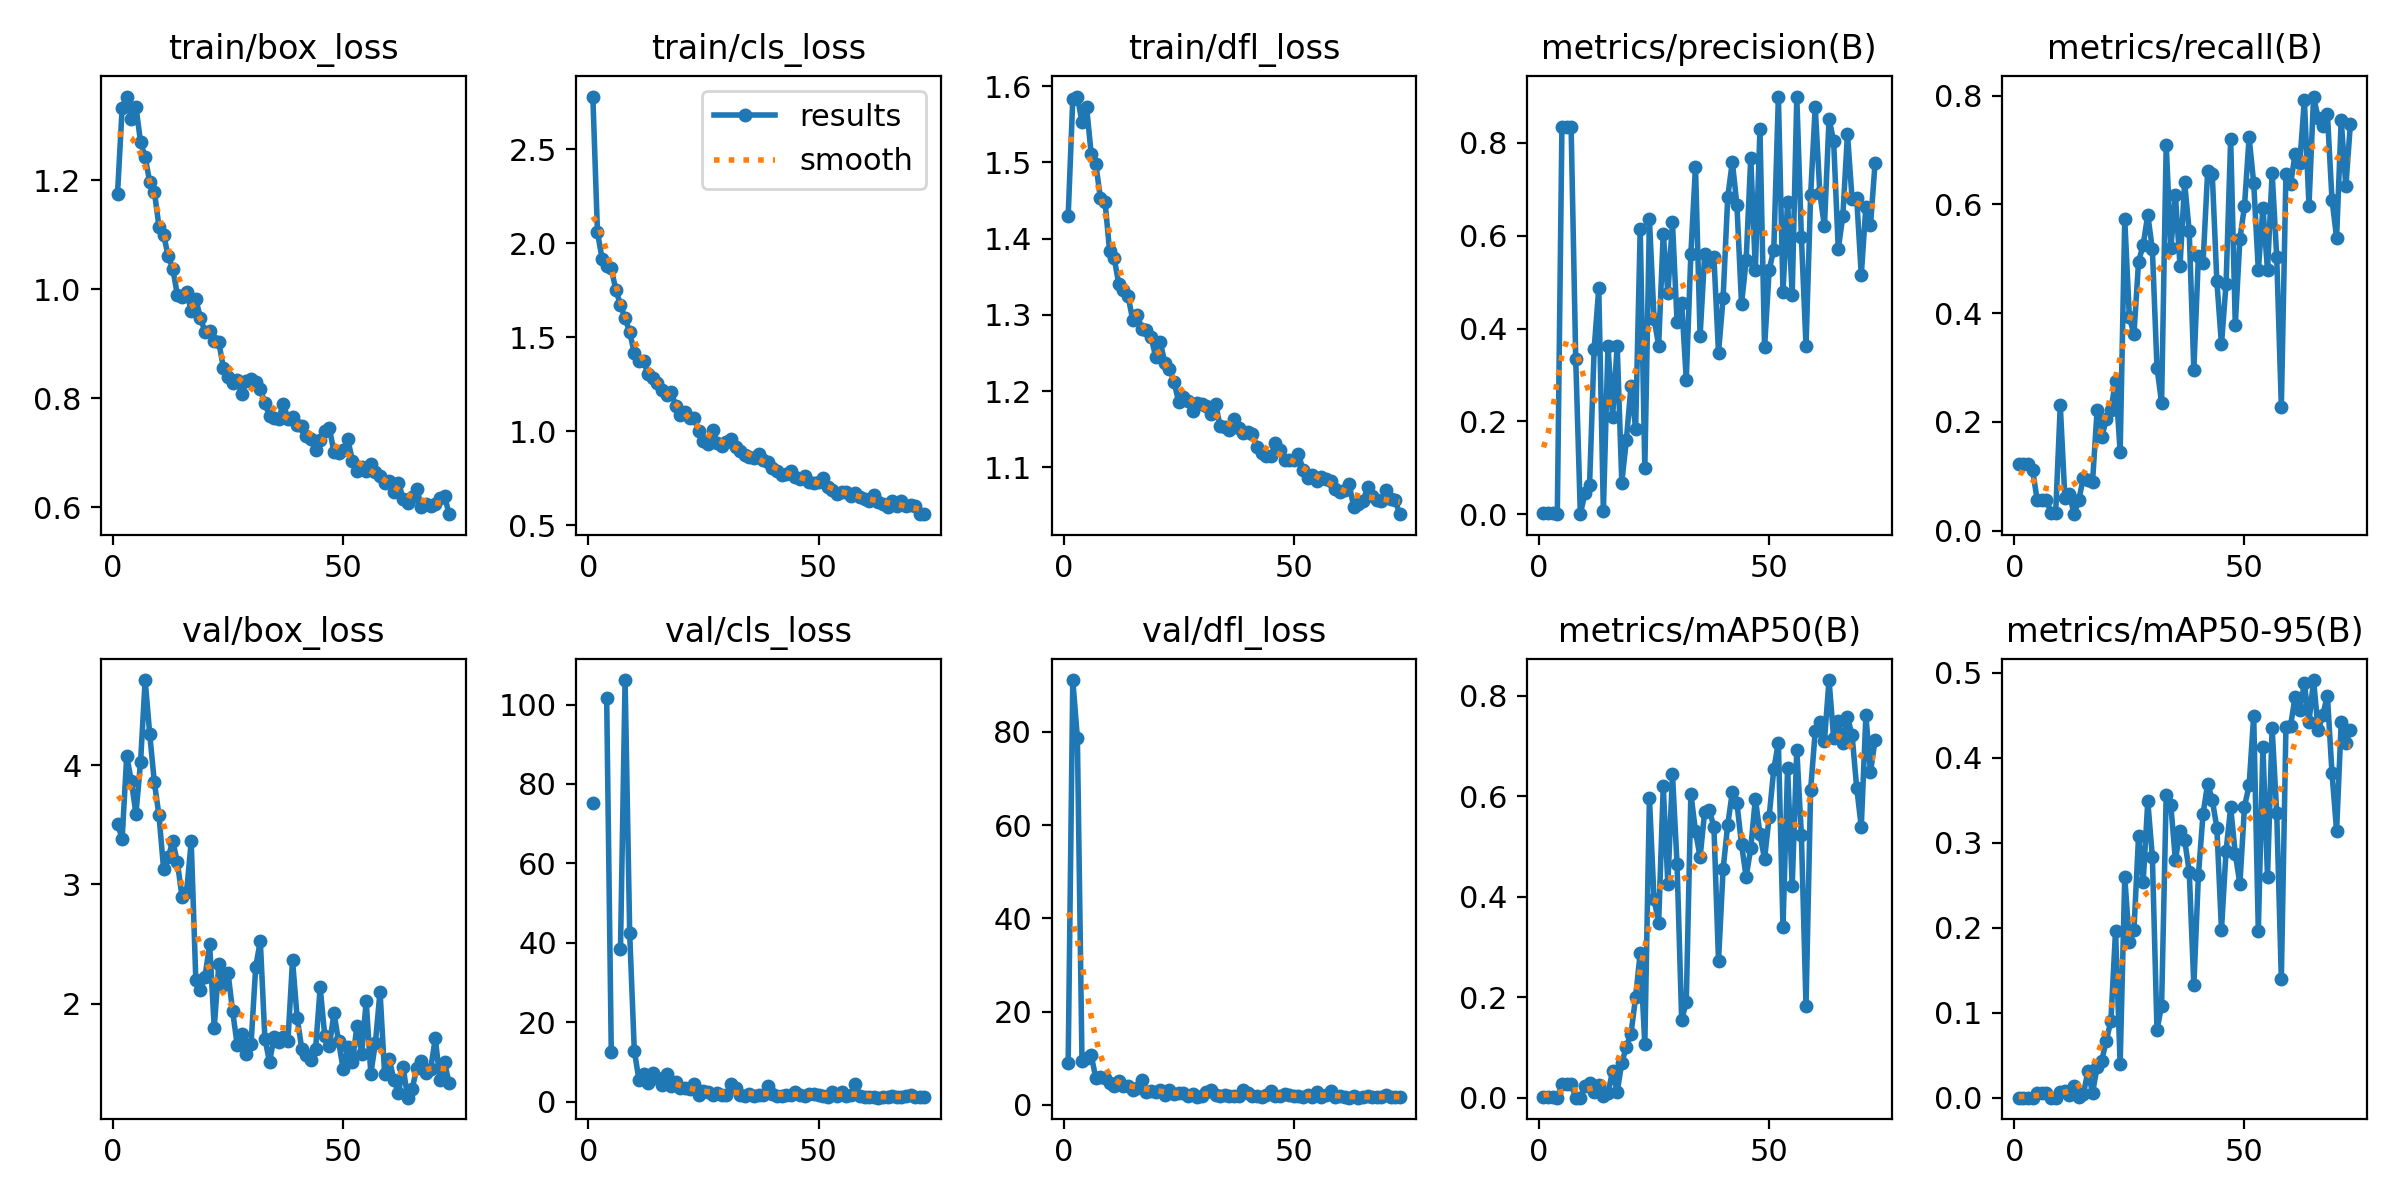

In [10]:
show_image(f"{project}/{name}/results.png", width=800)

In [ ]:
# 새로운 가중치 저장
model.save('best.pt')

### Best.pt Load

In [11]:
# 최적의 성능을 보인 모델 가중치 불러오기
# 학습 과정 중 검증 데이터셋에 대해 가장 높은 성능을 보인 시점의 모델 가중치를 로드합니다.
model = YOLO(f"{project}/{name}/weights/best.pt")

In [12]:
test_name = "test_result"

In [13]:
test_name = "test_result" # 테스트 결과를 저장할 폴더 이름 설정
test_result = model.val(
    imgsz=640,
    split="test",
    name=test_name,
    conf=0.5,           # 신뢰도 임계값 설정 (기본값: 0.25)
    iou=0.4             # NMS IoU 임계값 설정
    ) # 테스트 데이터셋 평가 실행

Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/detection_data/test/labels... 24 images, 0 backgrounds, 0 corrupt: 100%|██████████| 24/24 [00:00<00:00, 2106.46it/s]

val: New cache created: /content/detection_data/test/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.65it/s]


                   all         24         26      0.905      0.564      0.761      0.487
                gorani          6          6          1        0.5       0.75      0.472
                weasel          9          9      0.714      0.556      0.714      0.371
             wild boar          9         11          1      0.636      0.818      0.616
Speed: 0.4ms preprocess, 9.3ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/test_result


#### 결과 보기

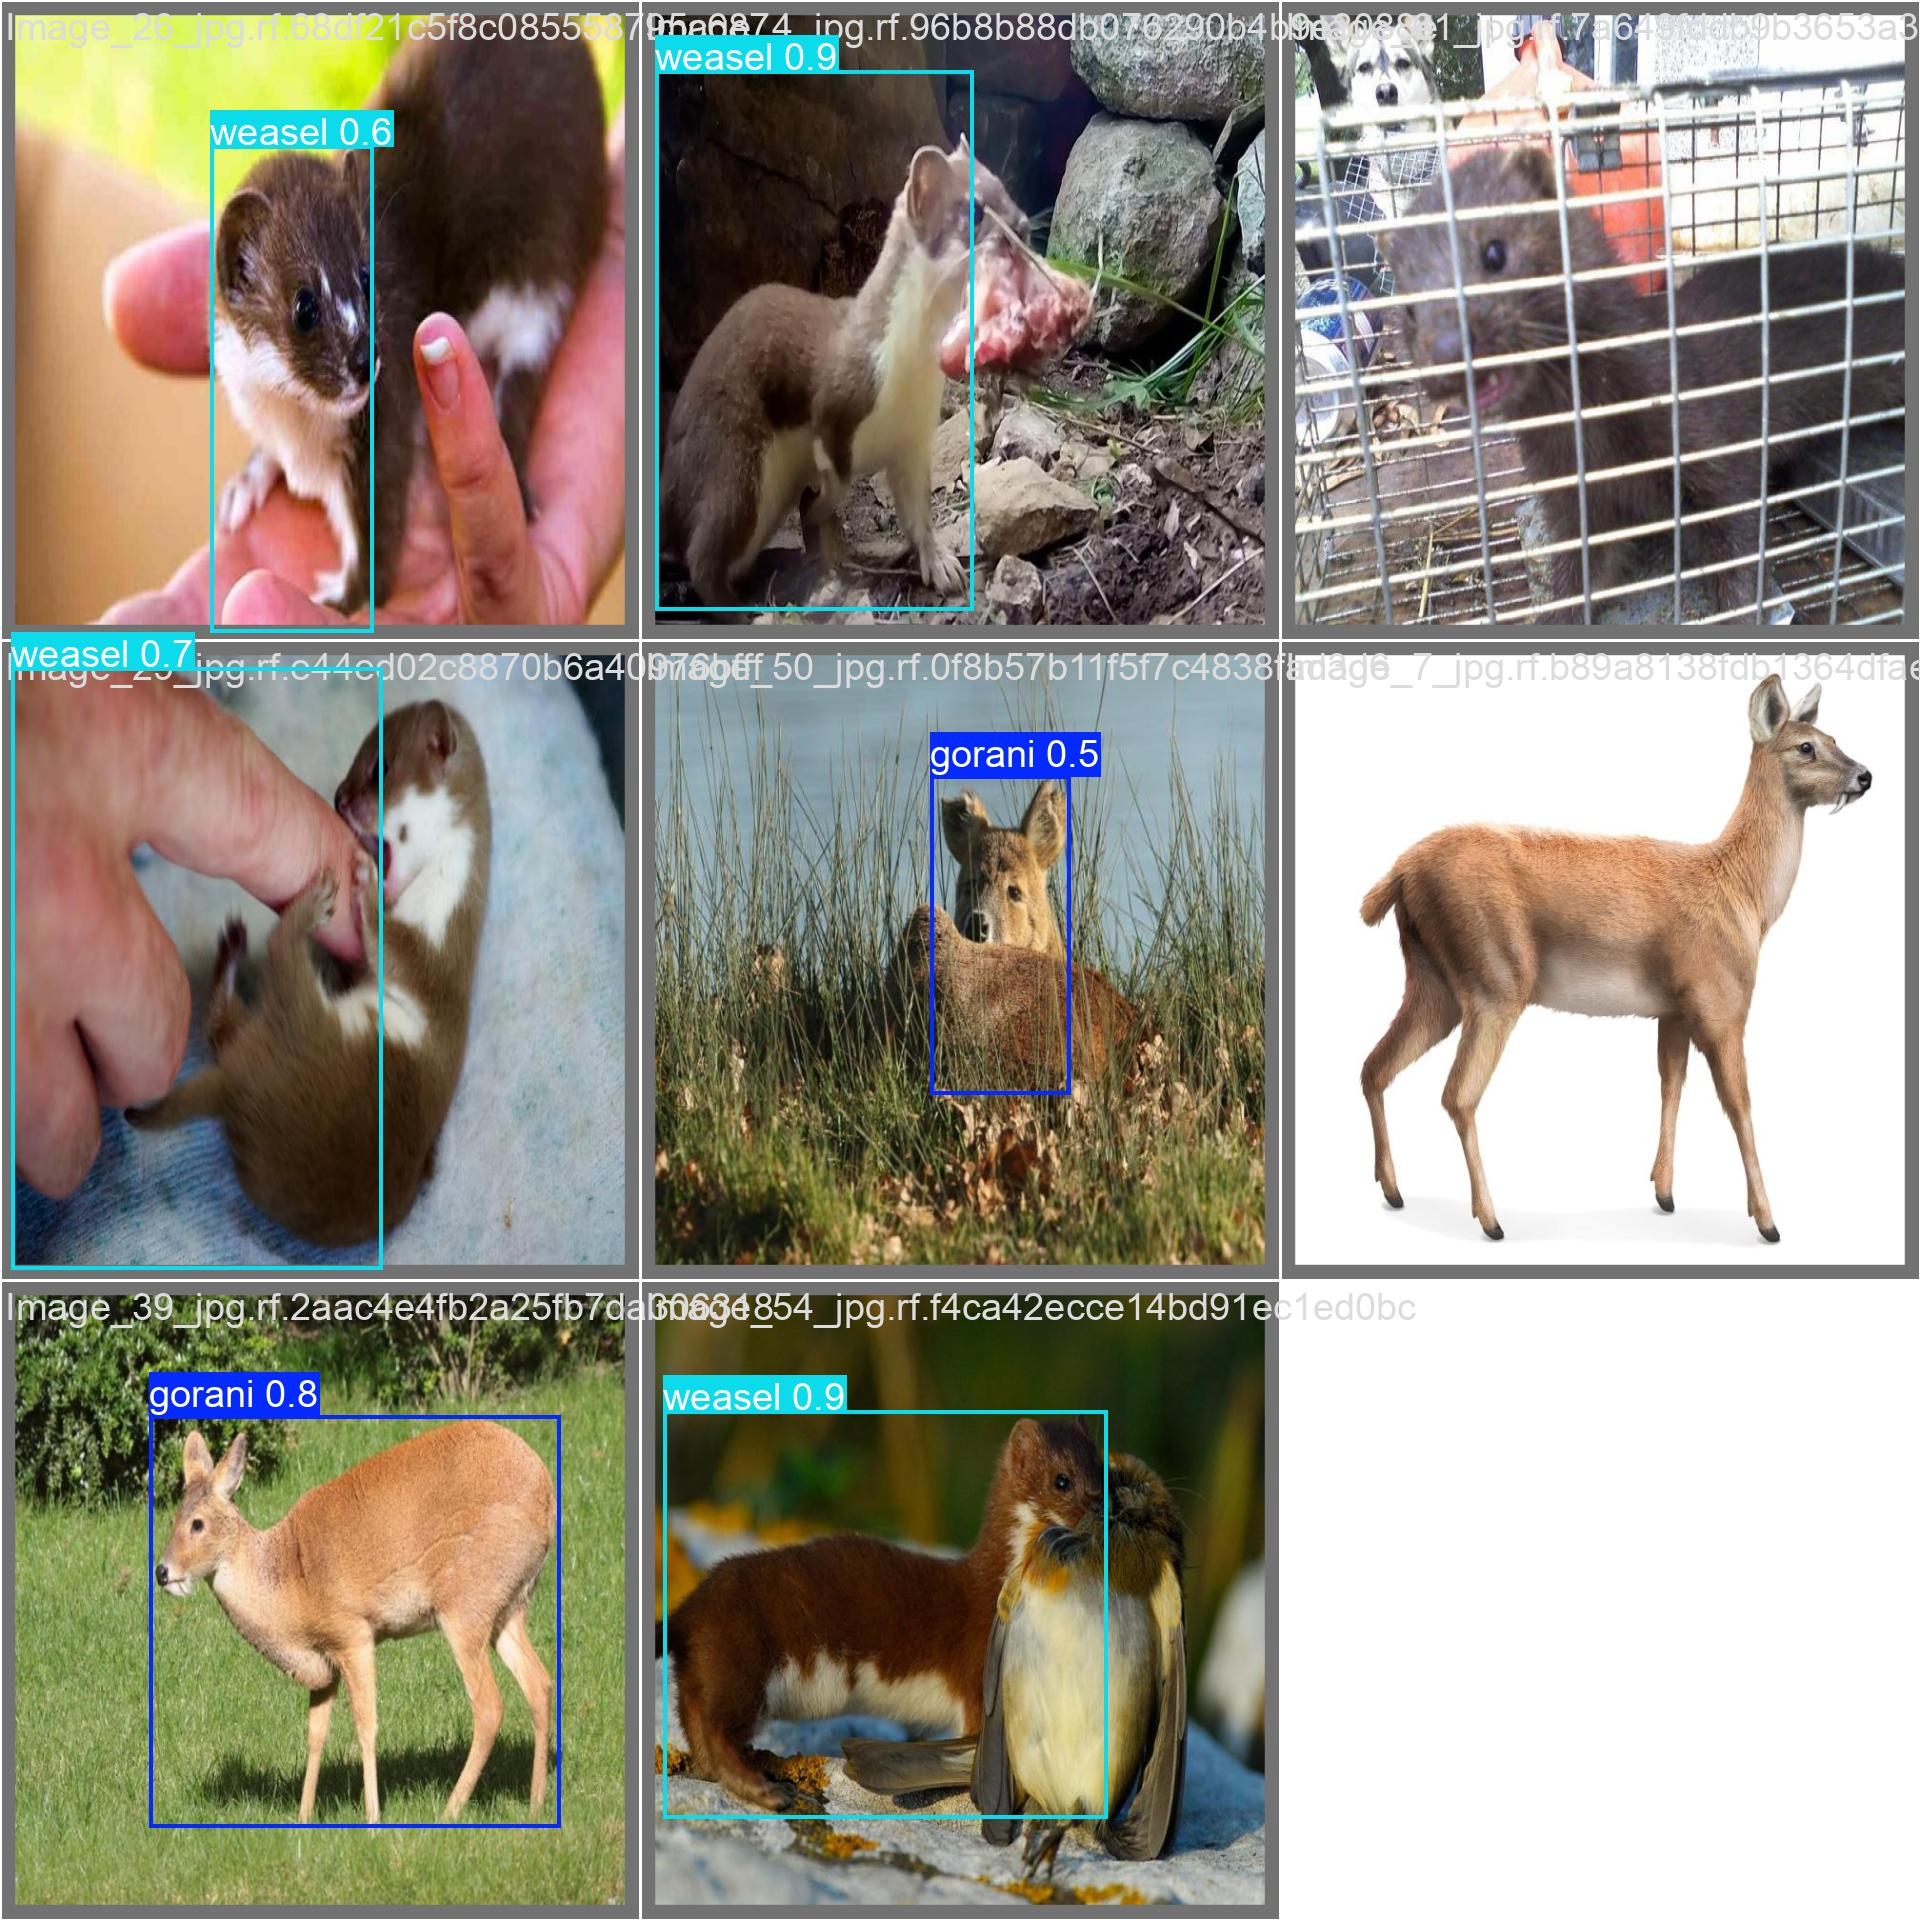

In [18]:
show_image("/content/runs/detect/test_result/val_batch1_pred.jpg", width=800)

In [ ]:
show_image("/content/runs/detect/test_result/val_batch0_labels.jpg", width=800)

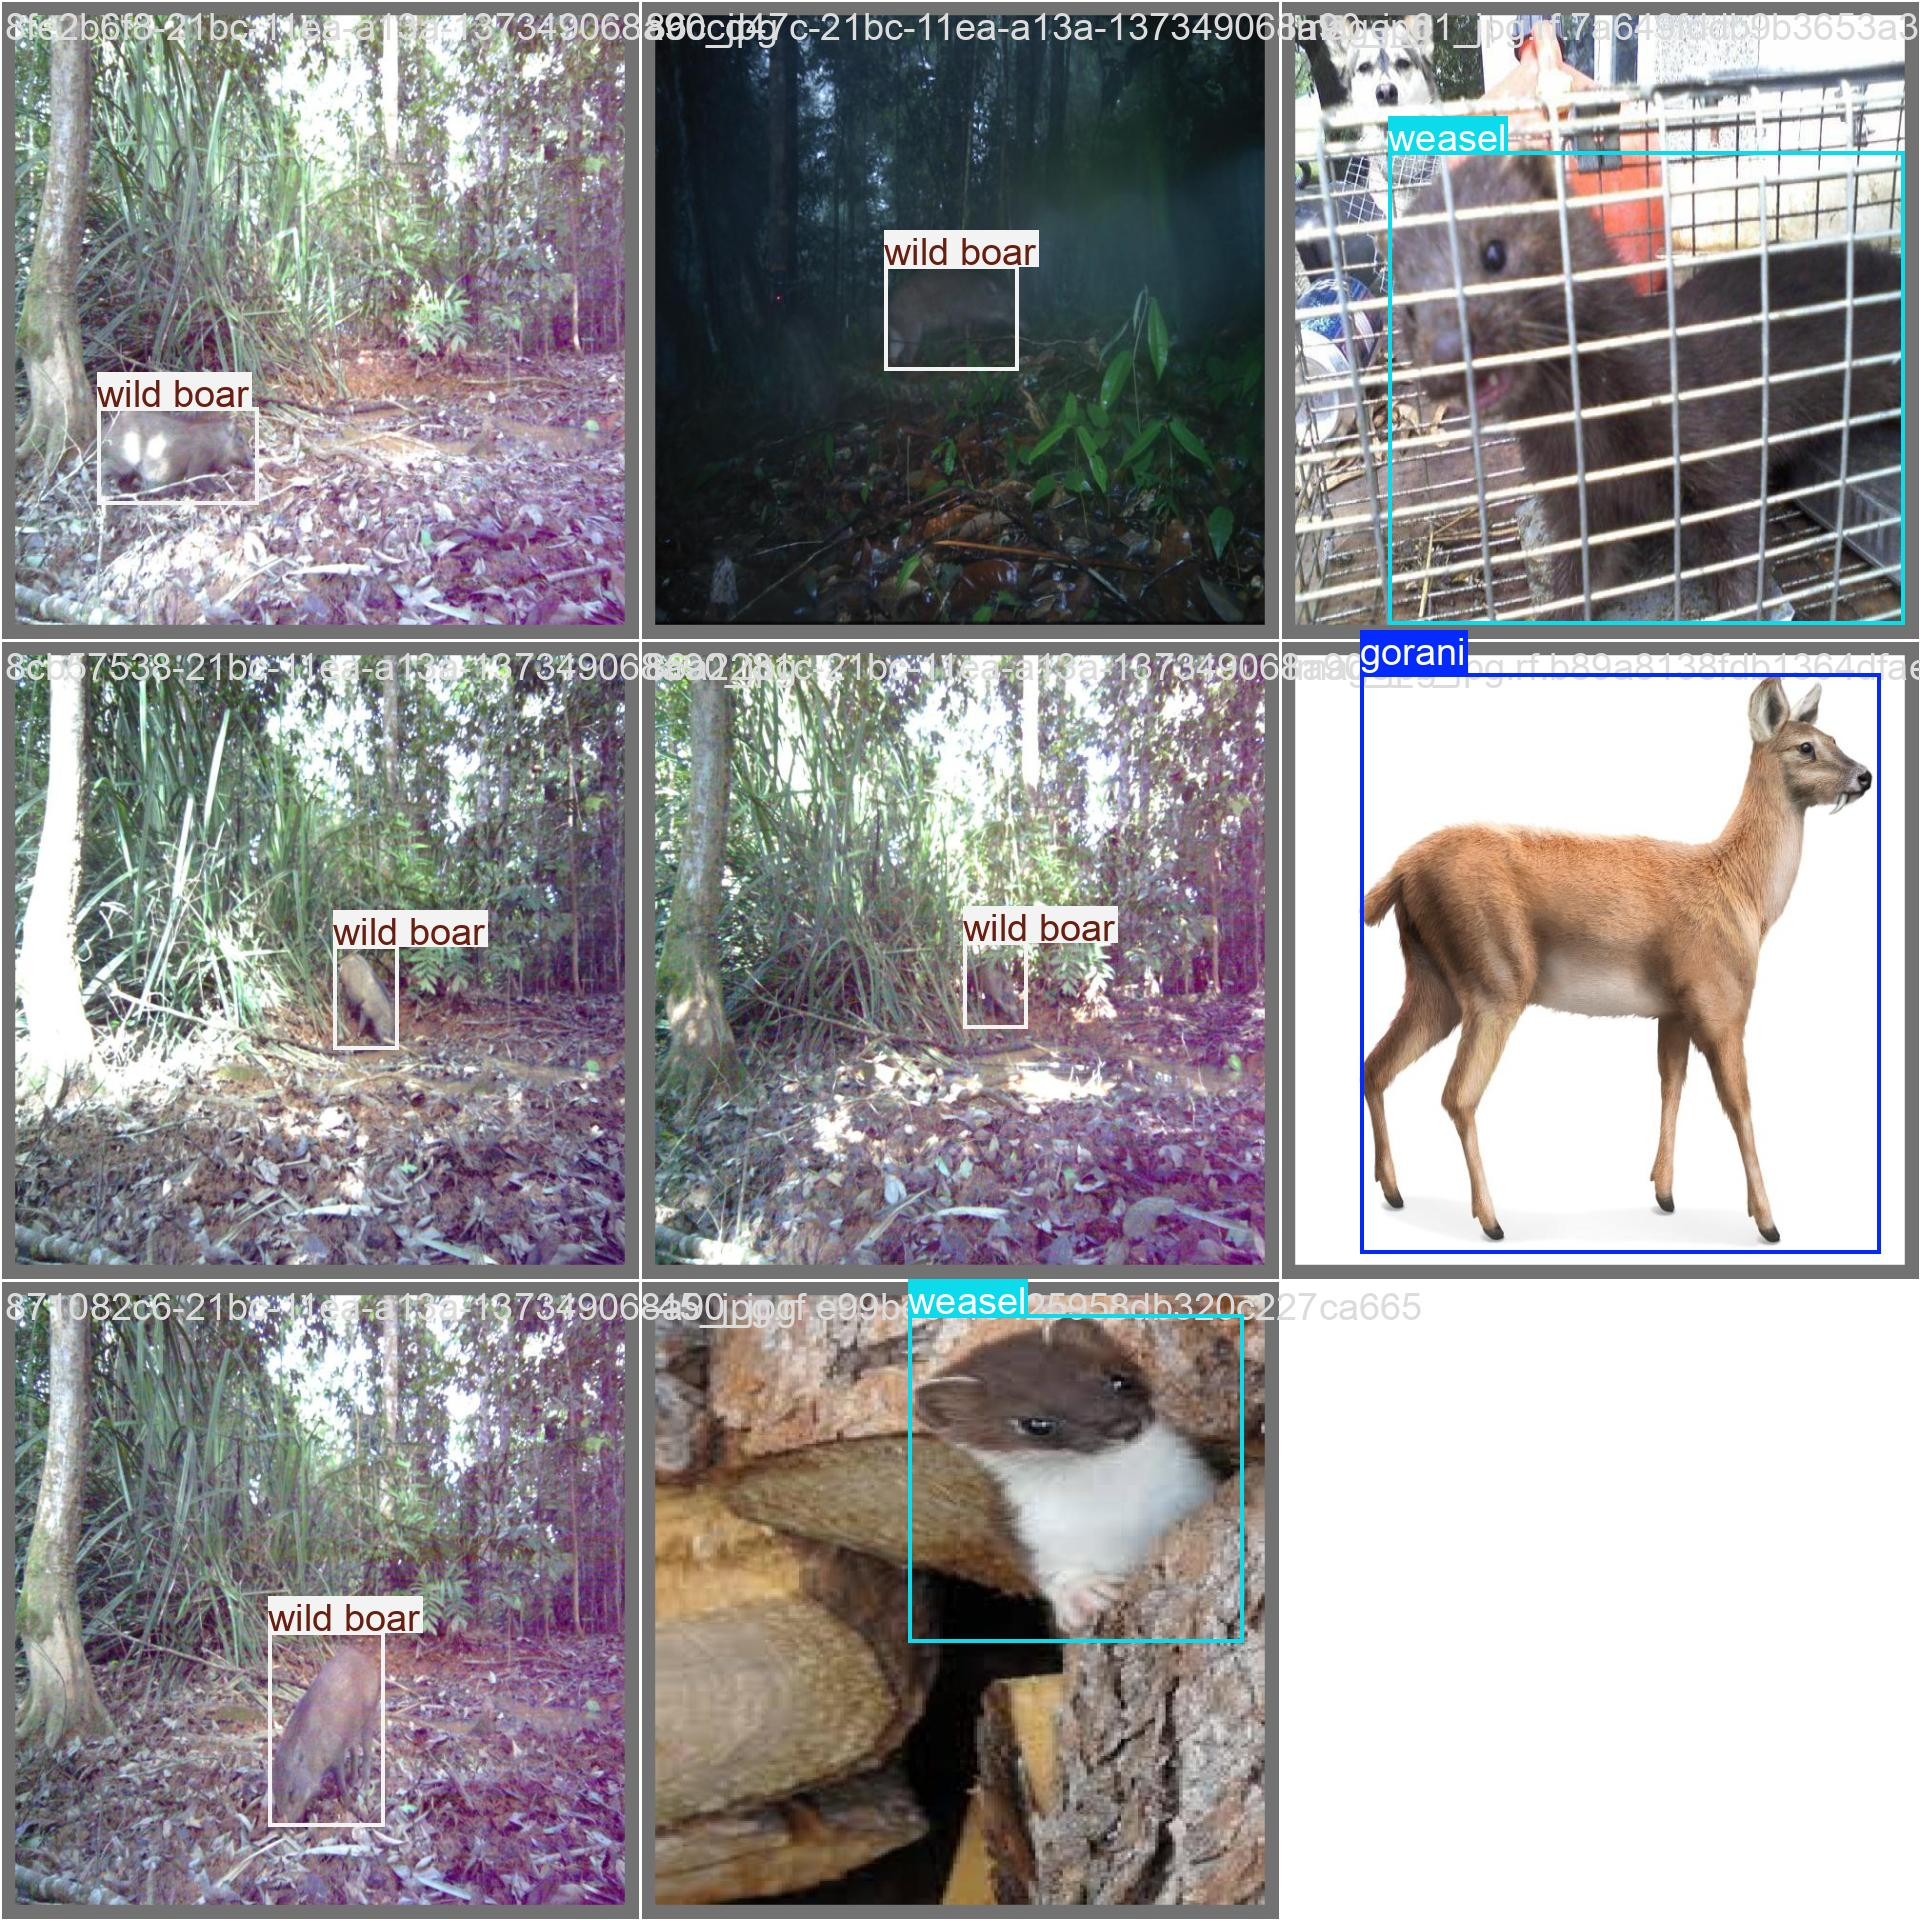

In [ ]:
show_image("/content/runs/detect/test_result2/val_batch1_labels.jpg", width=800)

동영상으로 보기

In [31]:
import cv2
from ultralytics import YOLO

# 1. YOLO 모델 로드
model = YOLO(f"{project}/{name}/weights/best.pt")  # 학습 완료된 모델 경로

# 2. 비디오 파일 경로 및 출력 설정
video_path = "/content/제주시청에 야생 족제비 나타나.mp4"  # 입력 비디오 파일 경로
output_path = "/content/output_video.mp4"  # 출력 비디오 파일 경로

cap = cv2.VideoCapture(video_path)
fps = int(cap.get(cv2.CAP_PROP_FPS))
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

# 3. 비디오 처리 루프
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # YOLO 모델 추론
    results = model(frame,conf=0.5, iou=0.45, imgsz=640)
    annotated_frame = results[0].plot()  # 결과 시각화

    # 저장
    out.write(annotated_frame)

# 4. 리소스 해제
cap.release()
out.release()

# Colab에서 결과 비디오 다운로드 링크 생성
from google.colab import files
files.download(output_path)



0: 384x640 (no detections), 9.9ms
Speed: 2.0ms preprocess, 9.9ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 6.6ms
Speed: 2.0ms preprocess, 6.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 7.0ms
Speed: 2.4ms preprocess, 7.0ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 8.6ms
Speed: 2.9ms preprocess, 8.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 7.2ms
Speed: 2.2ms preprocess, 7.2ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 6.7ms
Speed: 2.4ms preprocess, 6.7ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 7.0ms
Speed: 2.3ms preprocess, 7.0ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 6.9ms
Speed: 2.1ms preprocess, 6.9ms inference, 0.6ms 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

드라이브에 자료 옮기기

In [ ]:
import shutil
import os

source_path = '/content/make_pasukkun'
destination_path = '/content/drive/MyDrive/AI_Nvidia/object_detection/second_try'

os.makedirs(destination_path, exist_ok=True)

# 파일/폴더 추가 복사
for item in os.listdir(source_path):
    source_item = os.path.join(source_path, item)
    destination_item = os.path.join(destination_path, item)
    if os.path.isdir(source_item):
        shutil.copytree(source_item, destination_item, dirs_exist_ok=True)  # 하위 폴더 복사
    else:
        shutil.copy2(source_item, destination_item)  # 파일 복사

print(f"파일이 성공적으로 {destination_path}에 추가 복사되었습니다.")
